# Weather reading
---

In [4]:
# Data frames.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
# Import the data.

weather = pd.read_csv('https://raw.githubusercontent.com/atacanbt/programming_for_data_analytics/refs/heads/main/assignments/data/weather_reading_1.csv')

In [ ]:
# Read the first and last 5 rows of the data.

weather

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:00:00+00:00,2024-10-03T14:00:00+00:00,1,True,True,1,WeatherLink,335,77.8,...,False,-8.8545,53.5244,45,202410034sie5kcbthe69kyhyyguw31uhh,2024-10-03T14:00:00+00:00,1000013318,2024-10-03T14:00:25.2118092+00:00,1,12578832191
85,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:15:00+00:00,2024-10-03T14:15:00+00:00,1,True,True,1,WeatherLink,14,77.2,...,False,-8.8545,53.5244,45,202410037edh3yhb1re69kyhyyguw31uhh,2024-10-03T14:15:00+00:00,1000013318,2024-10-03T14:15:20.6677085+00:00,1,12578846874
86,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:30:00+00:00,2024-10-03T14:30:00+00:00,1,True,True,1,WeatherLink,354,76.9,...,False,-8.8545,53.5244,45,20241003b396uzhb1oe69kyhyytrtenn4a,2024-10-03T14:30:00+00:00,1000013318,2024-10-03T14:30:45.6588747+00:00,1,12578862046
87,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:45:00+00:00,2024-10-03T14:45:00+00:00,1,True,True,1,WeatherLink,307,76.5,...,False,-8.8545,53.5244,45,20241003m16wydcb1ae69kyhyytrtenn4a,2024-10-03T14:45:00+00:00,1000013318,2024-10-03T14:47:10.3227765+00:00,1,12578876749


In [25]:
# Dataset information.

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

<Axes: ylabel='dryBulbTemperature_Celsius'>

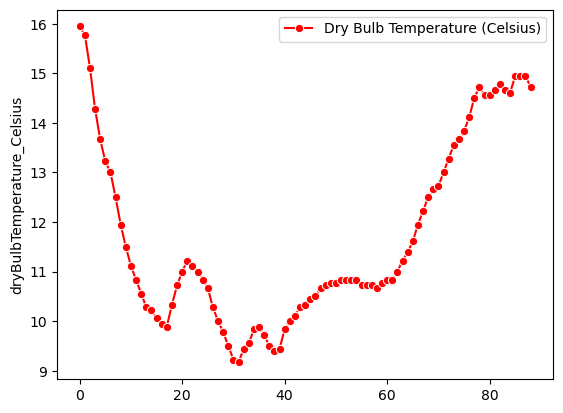

In [32]:
dry_temp_cels = weather['dryBulbTemperature_Celsius']

sns.lineplot(data=dry_temp_cels, color='red', label='Dry Bulb Temperature (Celsius)', marker='o')

